In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
#Loading the dataset
dataset=pd.read_csv('column_3C.csv')
dataset

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [3]:
# retrieving the dimensions of the dataset
dataset.shape

(310, 7)

In [4]:
dataset.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [5]:
dataset.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [6]:
#printing a concise summary of the DataFrame
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [7]:
#returning a statistical description of the data in the DataFrame
dataset.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767933
75%,72.877696,22.120395,63.000000,52.695889,125.467675,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [8]:
#returning a statistical description of the data in all columns of the DataFrame
dataset.describe(include='all')

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310
unique,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,Spondylolisthesis
freq,NaN,NaN,NaN,NaN,NaN,NaN,150
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,NaN
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,NaN
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,NaN
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,NaN
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767933,NaN
75%,72.877696,22.120395,63.000000,52.695889,125.467675,41.287352,NaN


In [9]:
#inspecting the presence of null values
dataset.iloc[:,:].isnull().values.any()

False

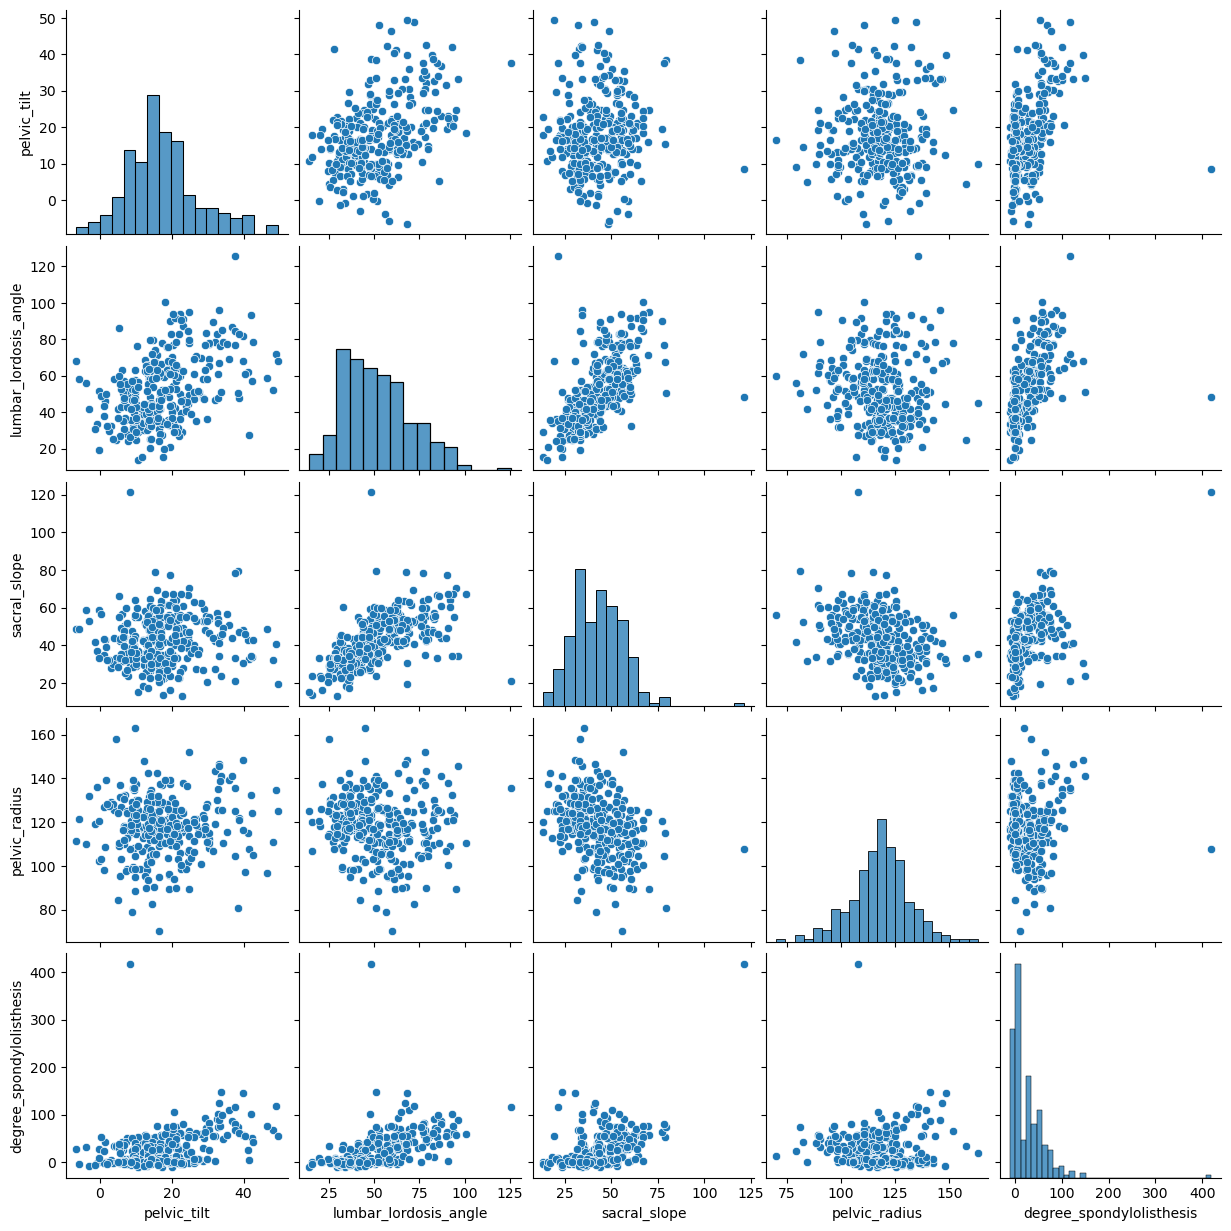

In [10]:
#series of scatterplots for each pair of variables and a histogram for each variable
sns.pairplot(dataset.iloc[:,1:7])

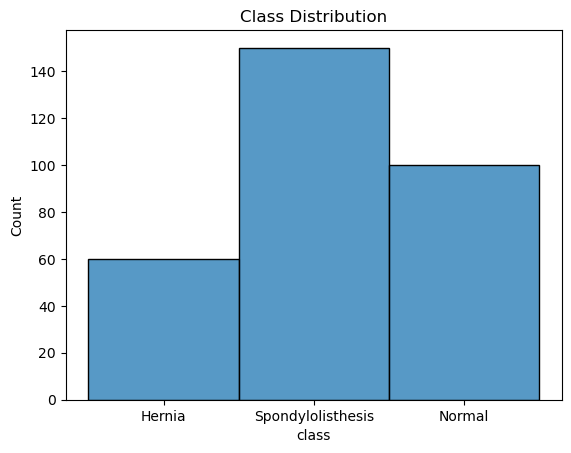

In [11]:
#plotting the distribution of column Clas
sns.histplot(dataset['class'])
plt.title('Class Distribution')
plt.show()

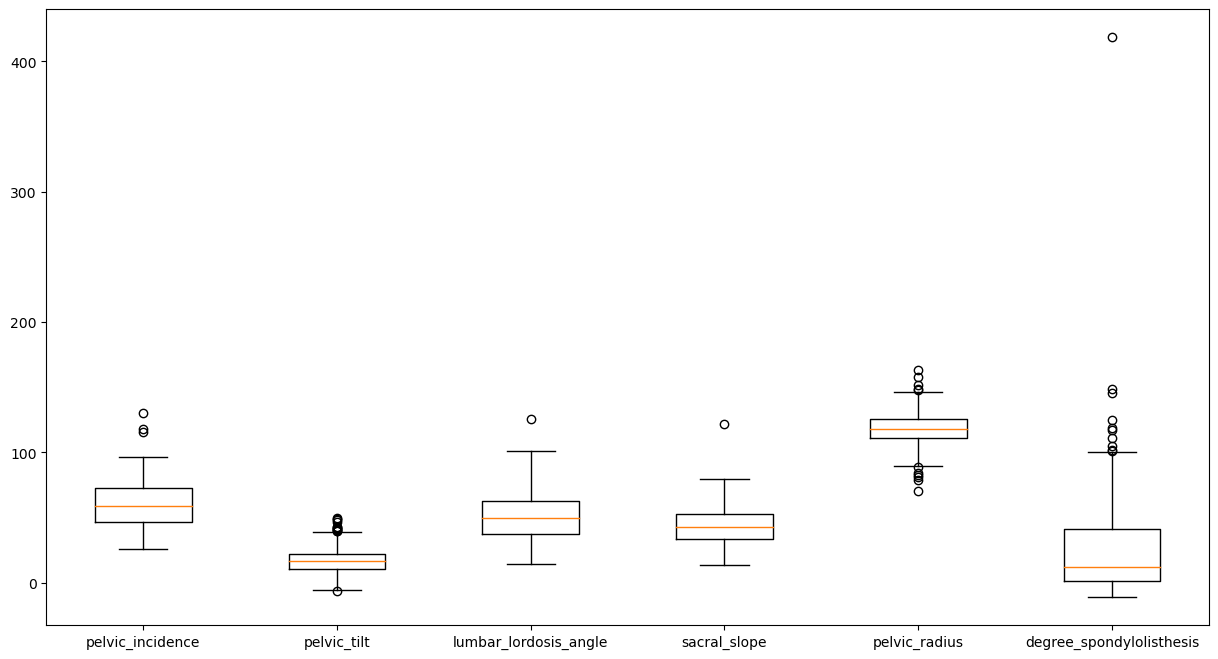

In [12]:
plt.figure(figsize=(15,8))
plt.boxplot(x=[dataset.pelvic_incidence,dataset.pelvic_tilt,dataset.lumbar_lordosis_angle,dataset.sacral_slope,dataset.pelvic_radius,dataset.degree_spondylolisthesis])
plt.xticks([1,2,3,4,5,6],['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis'])
plt.show()

<Axes: xlabel='class', ylabel='pelvic_incidence'>

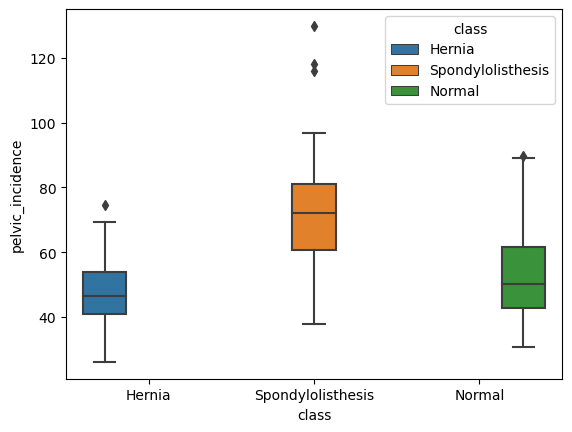

In [13]:
sns.boxplot(x = 'class', y = 'pelvic_incidence', data = dataset, hue = 'class')

<Axes: xlabel='class', ylabel='pelvic_tilt'>

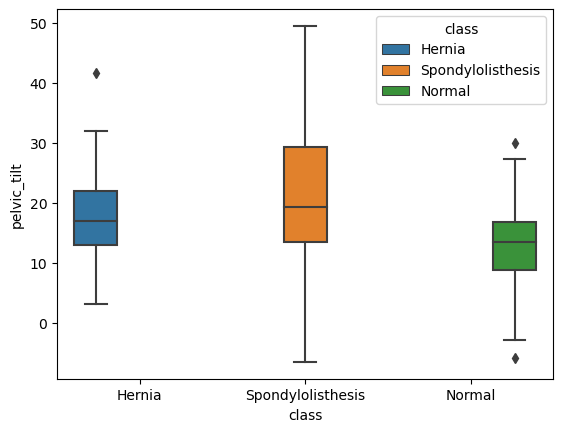

In [14]:
sns.boxplot(x = 'class', y = 'pelvic_tilt', data = dataset, hue = 'class')

<Axes: xlabel='class', ylabel='lumbar_lordosis_angle'>

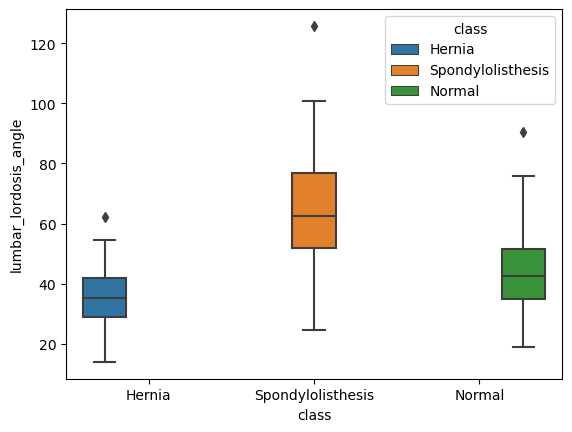

In [15]:
sns.boxplot(x = 'class', y = 'lumbar_lordosis_angle', data = dataset, hue = 'class')

<Axes: xlabel='class', ylabel='sacral_slope'>

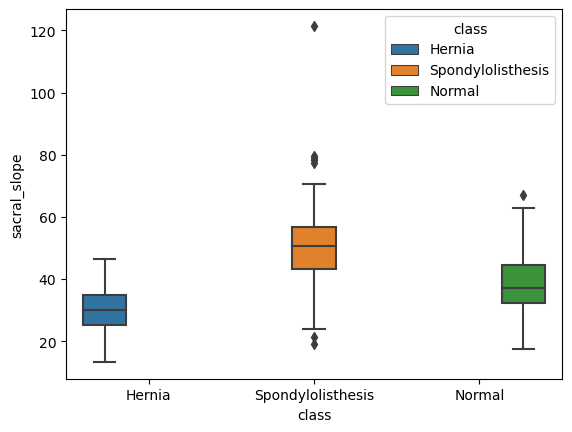

In [16]:
sns.boxplot(x = 'class', y = 'sacral_slope', data = dataset, hue = 'class')

<Axes: xlabel='class', ylabel='pelvic_radius'>

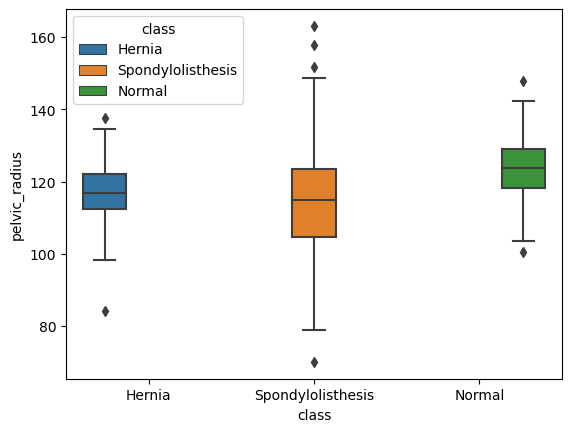

In [17]:
sns.boxplot(x = 'class', y = 'pelvic_radius', data = dataset, hue = 'class')


<Axes: xlabel='class', ylabel='degree_spondylolisthesis'>

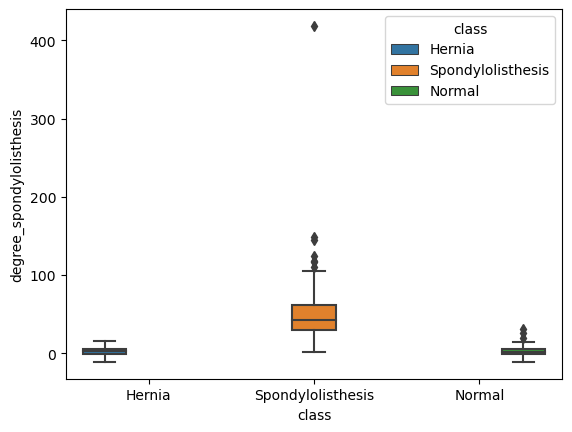

In [18]:
sns.boxplot(x = 'class', y = 'degree_spondylolisthesis', data = dataset, hue = 'class')

In [19]:
#converting 'Class'to numerical value
dataset['class']=dataset['class'].replace(['Normal','Hernia','Spondylolisthesis'],[0,1,2])
dataset.head()
dataset

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


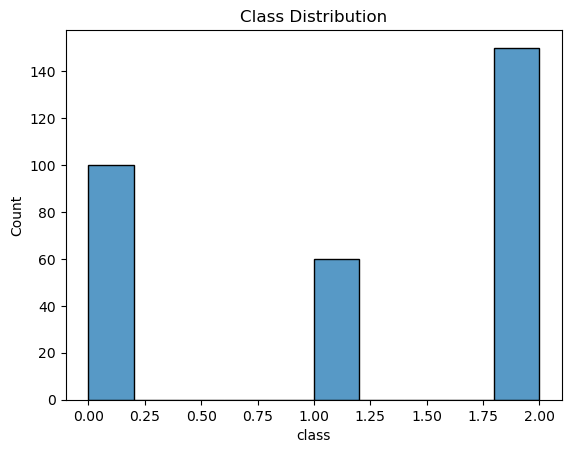

In [20]:
#plotting the distribution of column Clas
sns.histplot(dataset['class'])
plt.title('Class Distribution')
plt.show()

In [21]:
dataset['class'].value_counts()

2    150
0    100
1     60
Name: class, dtype: int64

<Axes: xlabel='class', ylabel='count'>

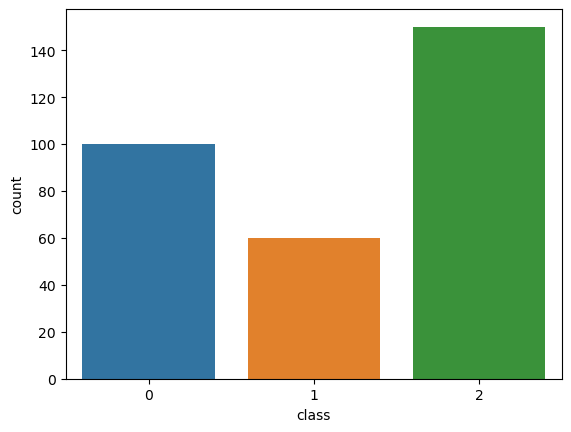

In [22]:
sns.countplot(dataset,x='class')

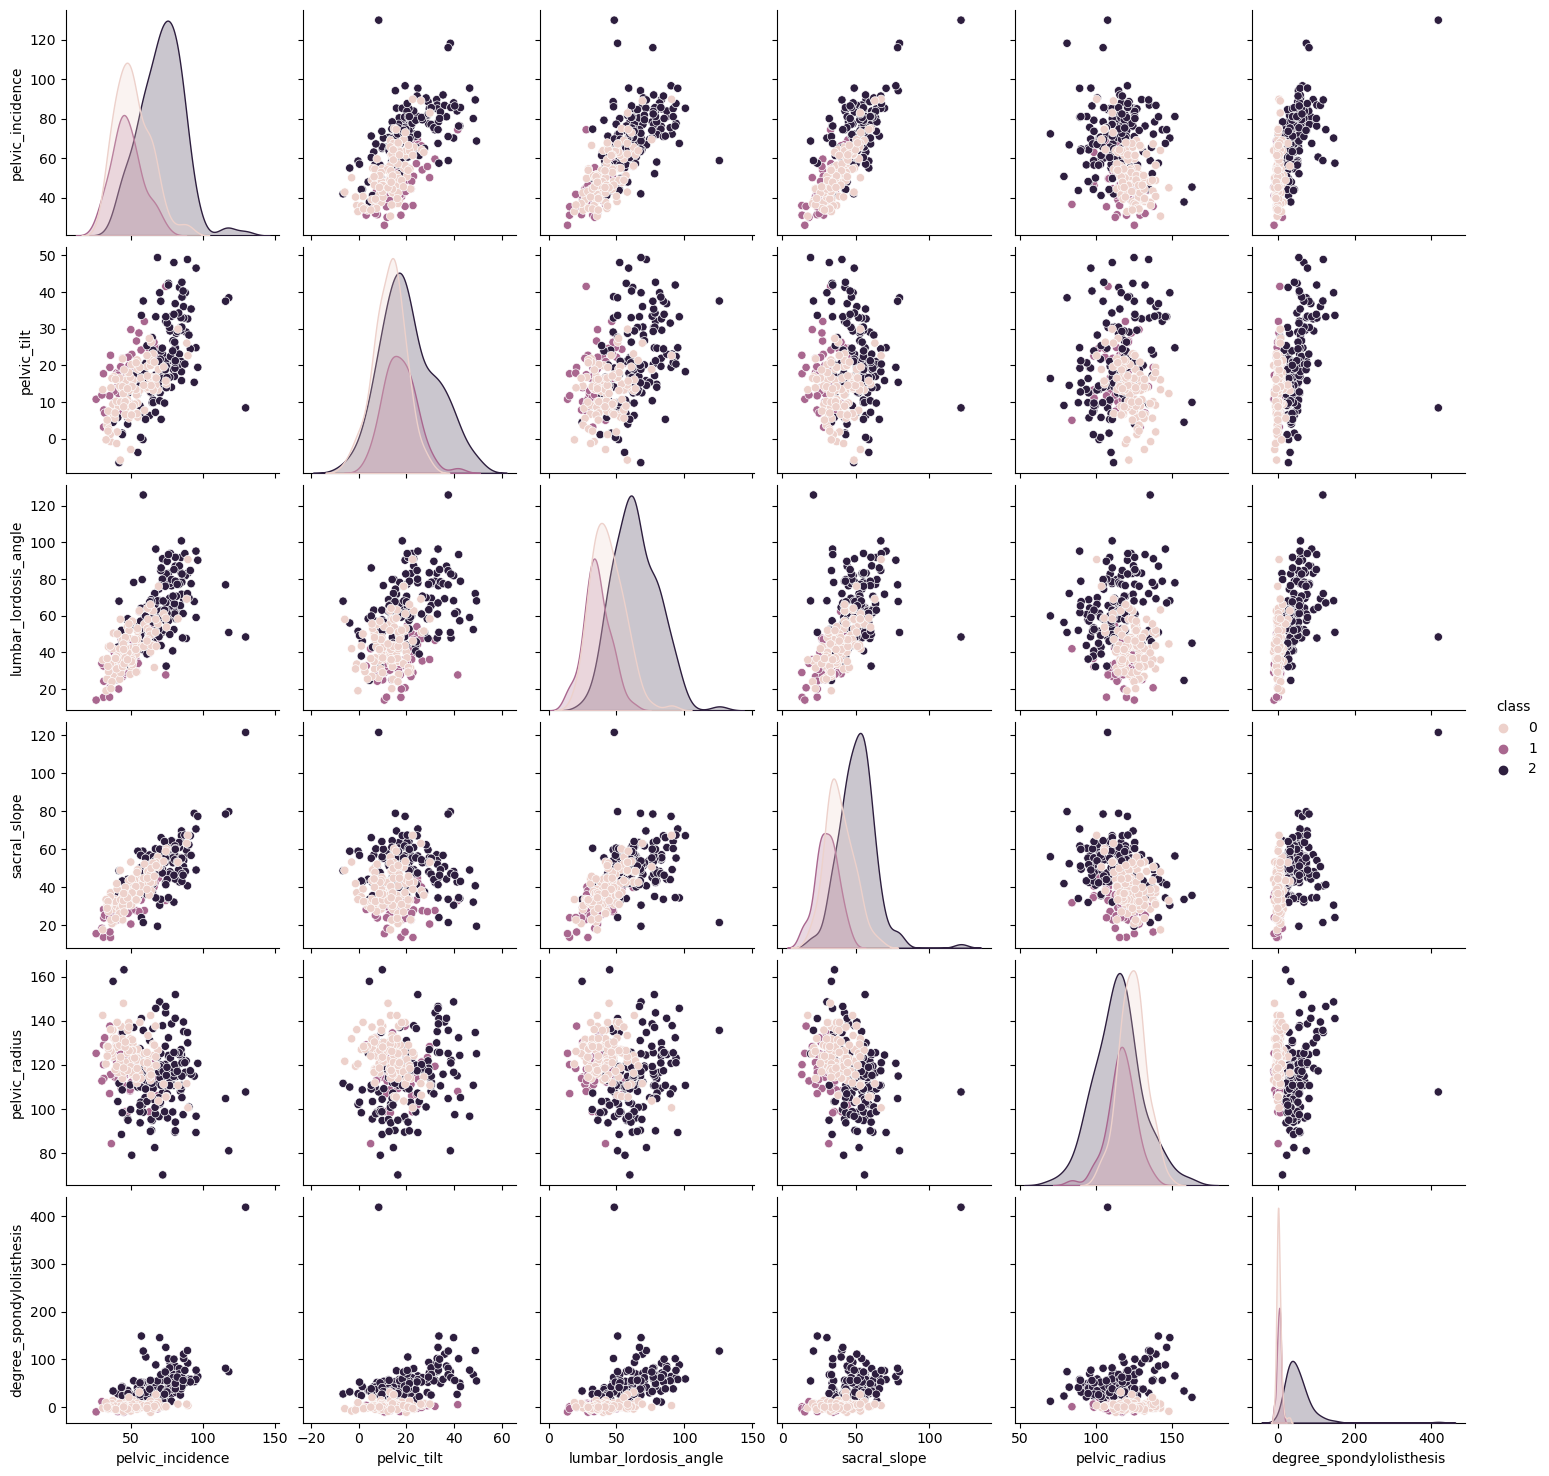

In [23]:
#scatter plots of the independent variables in the dataset
#plt.figure(figsize=(10,5))
#plt.title("Scatter plots of the independent variables")
#sns.histplot(x=['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis'],hue='class',data=dataset)
#plt.show()

sns.pairplot(dataset, hue = 'class',vars=['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis'])
plt.show()

In [24]:
# Classification using KNN algorithm

# (a) Determining the class feature and input features:

#In this dataset, 'class' column is the class label or dependent variable,
#other columns  are independent variables or input features.
#first step, slicing data into input and output
#X=dataset.iloc[:,[0,1,2,3,4,5]].values
#y=dataset.iloc[:,6].values

In [25]:
# Classification using KNN algorithm

# (a) Determining the class feature and input features:

#In this dataset, 'class' column is the class label or dependent variable,
#other columns  are independent variables or input features.
#first step, slicing data into input and output
X = dataset.drop(columns=['class']).values
y = dataset['class'].values

In [26]:
X

array([[ 63.027817,  22.552586,  39.609117,  40.475232,  98.672917,
         -0.2544  ],
       [ 39.056951,  10.060991,  25.015378,  28.99596 , 114.405425,
          4.564259],
       [ 68.832021,  22.218482,  50.092194,  46.613539, 105.985135,
         -3.530317],
       ...,
       [ 61.446597,  22.694968,  46.170347,  38.751628, 125.670725,
         -2.70788 ],
       [ 45.252792,   8.693157,  41.583126,  36.559635, 118.545842,
          0.21475 ],
       [ 33.841641,   5.073991,  36.641233,  28.767649, 123.945244,
         -0.199249]])

In [27]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [28]:
# (b) Splitting the dataset into the Training set and the Test set:

#data splitting into training data and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=0)

In [29]:
y_test

array([1, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 1, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 0, 1, 2, 2, 0, 1, 2, 0, 1, 0, 2, 2, 0, 2, 0, 0, 0, 0, 1, 2, 1,
       1, 0, 2, 2, 0, 0, 0, 0, 1, 2, 2, 1, 2, 2, 0, 0, 2, 2, 1, 1, 2, 0,
       2, 1, 2, 2, 1], dtype=int64)

In [30]:
values_to_count = [0, 1, 2]

# Count occurrences of each value
counts = [np.count_nonzero(y_test == value) for value in values_to_count]

for value, count in zip(values_to_count, counts):
    print(f"Count of {value}: {count}")

Count of 0: 30
Count of 1: 18
Count of 2: 45


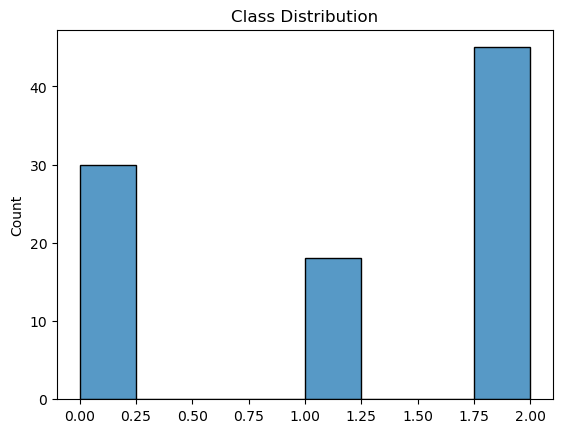

In [31]:
#plotting the distribution of column Clas
sns.histplot(y_test)
plt.title('Class Distribution')
plt.show()

In [32]:
# (c) Scaling features:

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_s=sc.fit_transform(X_train)
X_test_s=sc.transform(X_test)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(9,activation='relu',input_shape=(6,)))
model.add(tf.keras.layers.Dense(3,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
model.summary()

In [ ]:
class_weights = { 0:1, 1:6.5, 2:9.4}
history = model.fit(X_train,y_train, \
                    batch_size = 32, epochs = 100, \
                    verbose=2, class_weight=class_weights,\
                    validation_split=0.2
                    )

In [ ]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
plt.plot(accuracy, label='Training Set Accuracy')
plt.plot(validation_accuracy, label='Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

In [ ]:
loss = history.history['loss']
validation_loss = history.history['val_loss']
plt.plot(loss, label='Training Set Loss')
plt.plot(validation_loss, label='Validation Set Loss')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Across Epochs')
plt.legend()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

In [ ]:
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)
specificity_Class_1=round(confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[1,0]),2)
specificity_Class_2=round(confusion_matrix[2,2]/(confusion_matrix[2,2]+confusion_matrix[2,0]),2)
print(specificity_Class_1)
print(specificity_Class_2)
ax = sns.heatmap(confusion_matrix, cmap='flare',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))